In [21]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

In [22]:
epochs = 2

In [23]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [24]:
len(y_train), len(y_test)

(60000, 10000)

In [25]:
x_train = x_train.reshape(-1, 784) / 255.0 # scale ni 255 bdg. huvaasnaar 0-ees 1 utgatai boln
x_test = x_test.reshape(-1, 784) / 255.0

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(x_train, y_train, batch_size=128, epochs=epochs, validation_data=(x_test, y_test))

Epoch 1/2
469/469 [==============================] - 20s 31ms/step - loss: 0.2673 - accuracy: 0.9191 - val_loss: 0.1364 - val_accuracy: 0.9579
Epoch 2/2
469/469 [==============================] - 15s 32ms/step - loss: 0.0903 - accuracy: 0.9721 - val_loss: 0.0883 - val_accuracy: 0.9738


ValueError: x and y must have same first dimension, but have shapes (1,) and (2,)

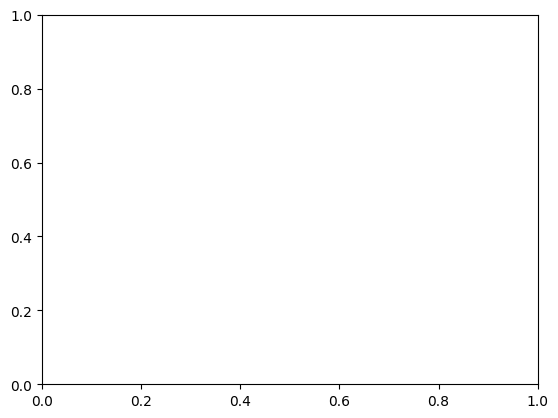

In [26]:

import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']


plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.figure()

plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

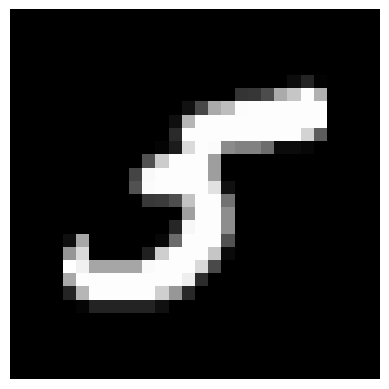

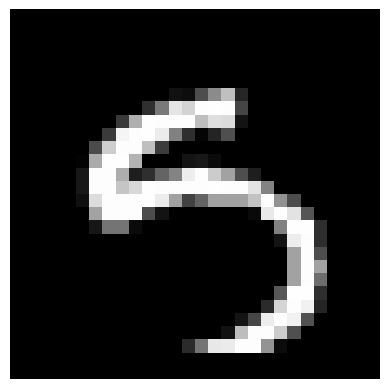

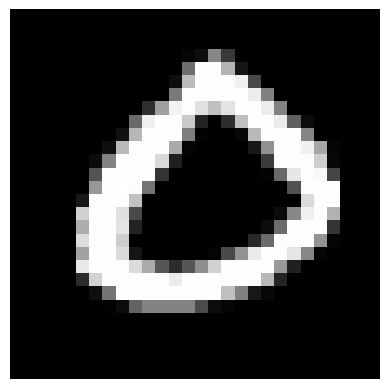

In [ ]:
import os
from PIL import Image



(x_train, _), (_, _) = mnist.load_data()

rand = np.random.choice(len(x_train), size=3, replace=False)

for i, j in enumerate(rand):
    image = x_train[j]

    resize = np.array(Image.fromarray(image).resize((28, 28)))

    name = f'{i+1}.png'
    path = os.path.join('.', name)
    plt.imsave(path, resize, cmap='gray')

    plt.imshow(resize, cmap='gray')
    plt.axis('off')
    plt.show()

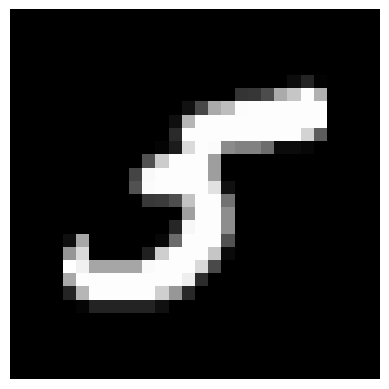

1/1 [==============================] - 0s 67ms/step
Predict 1.png: 5



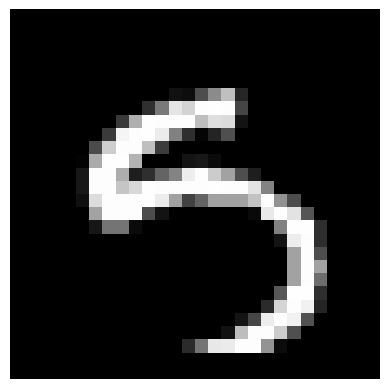

1/1 [==============================] - 0s 120ms/step
Predict 2.png: 5



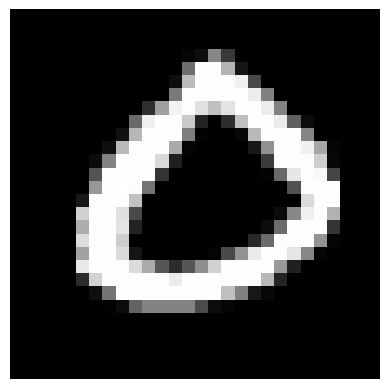

1/1 [==============================] - 0s 55ms/step
Predict 3.png: 0



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image

files = [file for file in os.listdir('./') if file.endswith('.png')]

for image_file in files:
   
    img_path = os.path.join('./', image_file)

    img = Image.open(img_path).convert('L') 
    img_array = np.array(img)
    plt.imshow(img_array, cmap='gray')
    plt.axis('off')
    plt.show()

    input_image = img_array.reshape(-1, 784) / 255.0
    predict = np.argmax(model.predict(input_image))

    print(f"Predict {image_file}: {predict}\n")

In [ ]:
model.predict(input_image)

1/1 [==============================] - 0s 83ms/step


array([[1.0000000e+00, 5.0989319e-17, 1.4095626e-14, 1.3015150e-11,
        6.2636051e-13, 3.4335822e-12, 6.0037273e-09, 6.5462691e-14,
        7.1372114e-12, 1.2688998e-10]], dtype=float32)